In [ ]:
!pip install kaggle -q

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download redwankarimsony/heart-disease-data


Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
heart-disease-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Unzip Dataset

! unzip /content/heart-disease-data.zip


Archive:  /content/heart-disease-data.zip
replace heart_disease_uci.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: heart_disease_uci.csv   


## ***Import Libraries***

In [ ]:
!pip install catboost -q

In [ ]:
# to handle data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# to preprocess data

from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



# machine learning tasks
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier



#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score

# ignore warnings

import warnings
warnings.filterwarnings('ignore')




## ***Load the Dataset***

In [ ]:
# Load dataset

df = pd.read_csv('/content/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


##***Expolratory Data Analysis (EDA)***

In [ ]:
df.shape

(920, 16)

In [ ]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 920
Number of columns: 16


In [ ]:
# Columns in the dataset

print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [ ]:
# Inforamtion about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
# unique values in columns

df.nunique()

,0
id,920
age,50
sex,2
dataset,4
cp,4
trestbps,61
chol,217
fbs,2
restecg,3
thalch,119


In [ ]:
# check null values in percentage

print(df.isnull().sum().sort_values(ascending=False))

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64


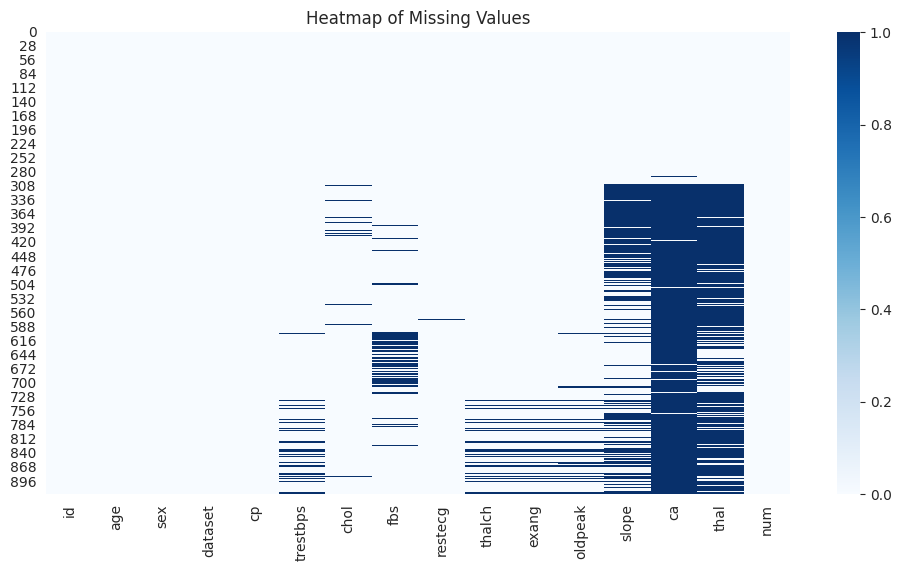

In [ ]:
# Heatmap of missing values

fig = plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=True,cmap='Blues')
plt.title('Heatmap of Missing Values')
plt.show()

### ***Impute Missing Values***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
# check null values in percentage

print(df.isnull().sum().sort_values(ascending=False)/len(df)*100)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64


In [ ]:
# split data into numerical & categorical columns

num_cols = [col for col in df.columns if df[col].dtype!='O']
cat_cols = [col for col in df.columns if col not in num_cols]


In [ ]:
# impute missing values in numeric columns using iterative imputer

df[num_cols] = IterativeImputer().fit_transform(df[num_cols])

# check null values

print(df.isnull().sum().sort_values(ascending=False)/len(df)*100)

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
thalch       0.000000
oldpeak      0.000000
ca           0.000000
num          0.000000
dtype: float64


In [ ]:
# Impute categorical columns using Random Forest Classifier

for col in cat_cols:
    # Separate data into known and unknown values for the current column
    known_data = df[df[col].notna()]
    unknown_data = df[df[col].isna()]

    # Check if there are any unknown values to impute
    if unknown_data.shape[0] > 0:  # Proceed only if there are unknown values
        # Define features and target for the Random Forest model
        # Exclude categorical features from X_known
        X_known = known_data.drop(columns=[col] + cat_cols)  # Exclude all cat_cols
        y_known = known_data[col]
        X_unknown = unknown_data.drop(columns=[col] + cat_cols) # Exclude all cat_cols

        # Create and fit LabelEncoder for the target variable
        encoder = LabelEncoder()
        y_known_encoded = encoder.fit_transform(y_known)

        # Create and train a Random Forest classifier
        model = RandomForestClassifier()
        model.fit(X_known, y_known_encoded)

        # Predict missing values and impute them in the DataFrame
        imputed_values = model.predict(X_unknown)
        imputed_values = encoder.inverse_transform(imputed_values)  # Inverse transform to get original labels
        df.loc[df[col].isna(), col] = imputed_values



In [ ]:
# check null values

print(df.isnull().sum().sort_values(ascending=False))


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


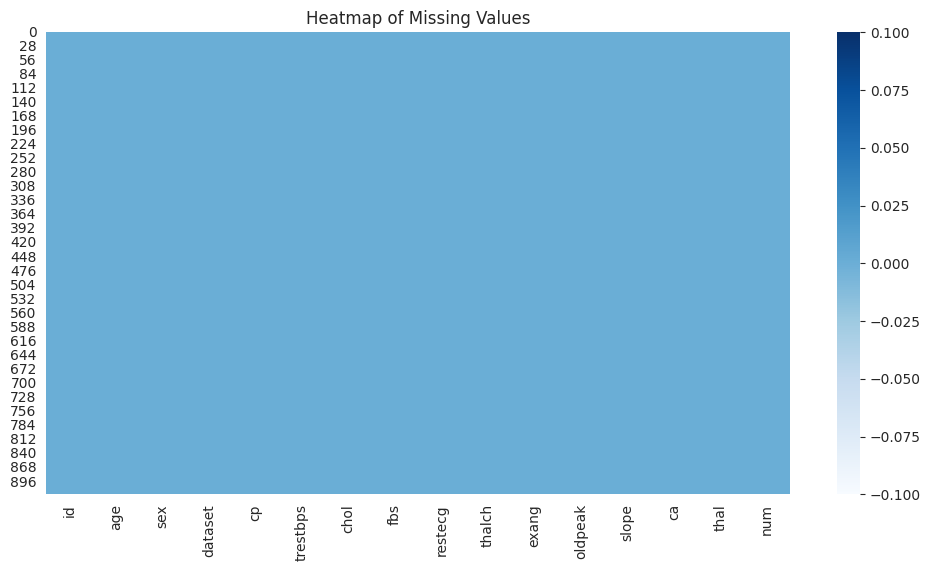

In [ ]:
# Heatmap of missing values

fig = plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=True,cmap='Blues')
plt.title('Heatmap of Missing Values')
plt.show()

***So we have 0 null values in the dataset***



---



## ***Let's Deal with Outliers***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    float64
 1   age       920 non-null    float64
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    float64
dtypes: float64(8), object(8)
memory usage: 115.1+ KB


In [ ]:
# boxplot of all numeric columns using for loop

fig = px.box(data_frame=df[num_cols], y='age')
fig.show()

fig = px.box(data_frame=df[num_cols], y='trestbps')
fig.show()

fig = px.box(data_frame=df[num_cols], y='chol')
fig.show()

fig = px.box(data_frame=df[num_cols], y='thalch')
fig.show()

fig = px.box(data_frame=df[num_cols], y='oldpeak')
fig.show()

fig = px.box(data_frame=df[num_cols], y='ca')
fig.show()




In [ ]:
# row where trestbps is 0

df[df['trestbps']==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754.0,55.0,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,1.910889,reversable defect,3.0


In [ ]:
# remove row where trestbps is 0

df.drop(df[df['trestbps']==0].index,inplace=True)

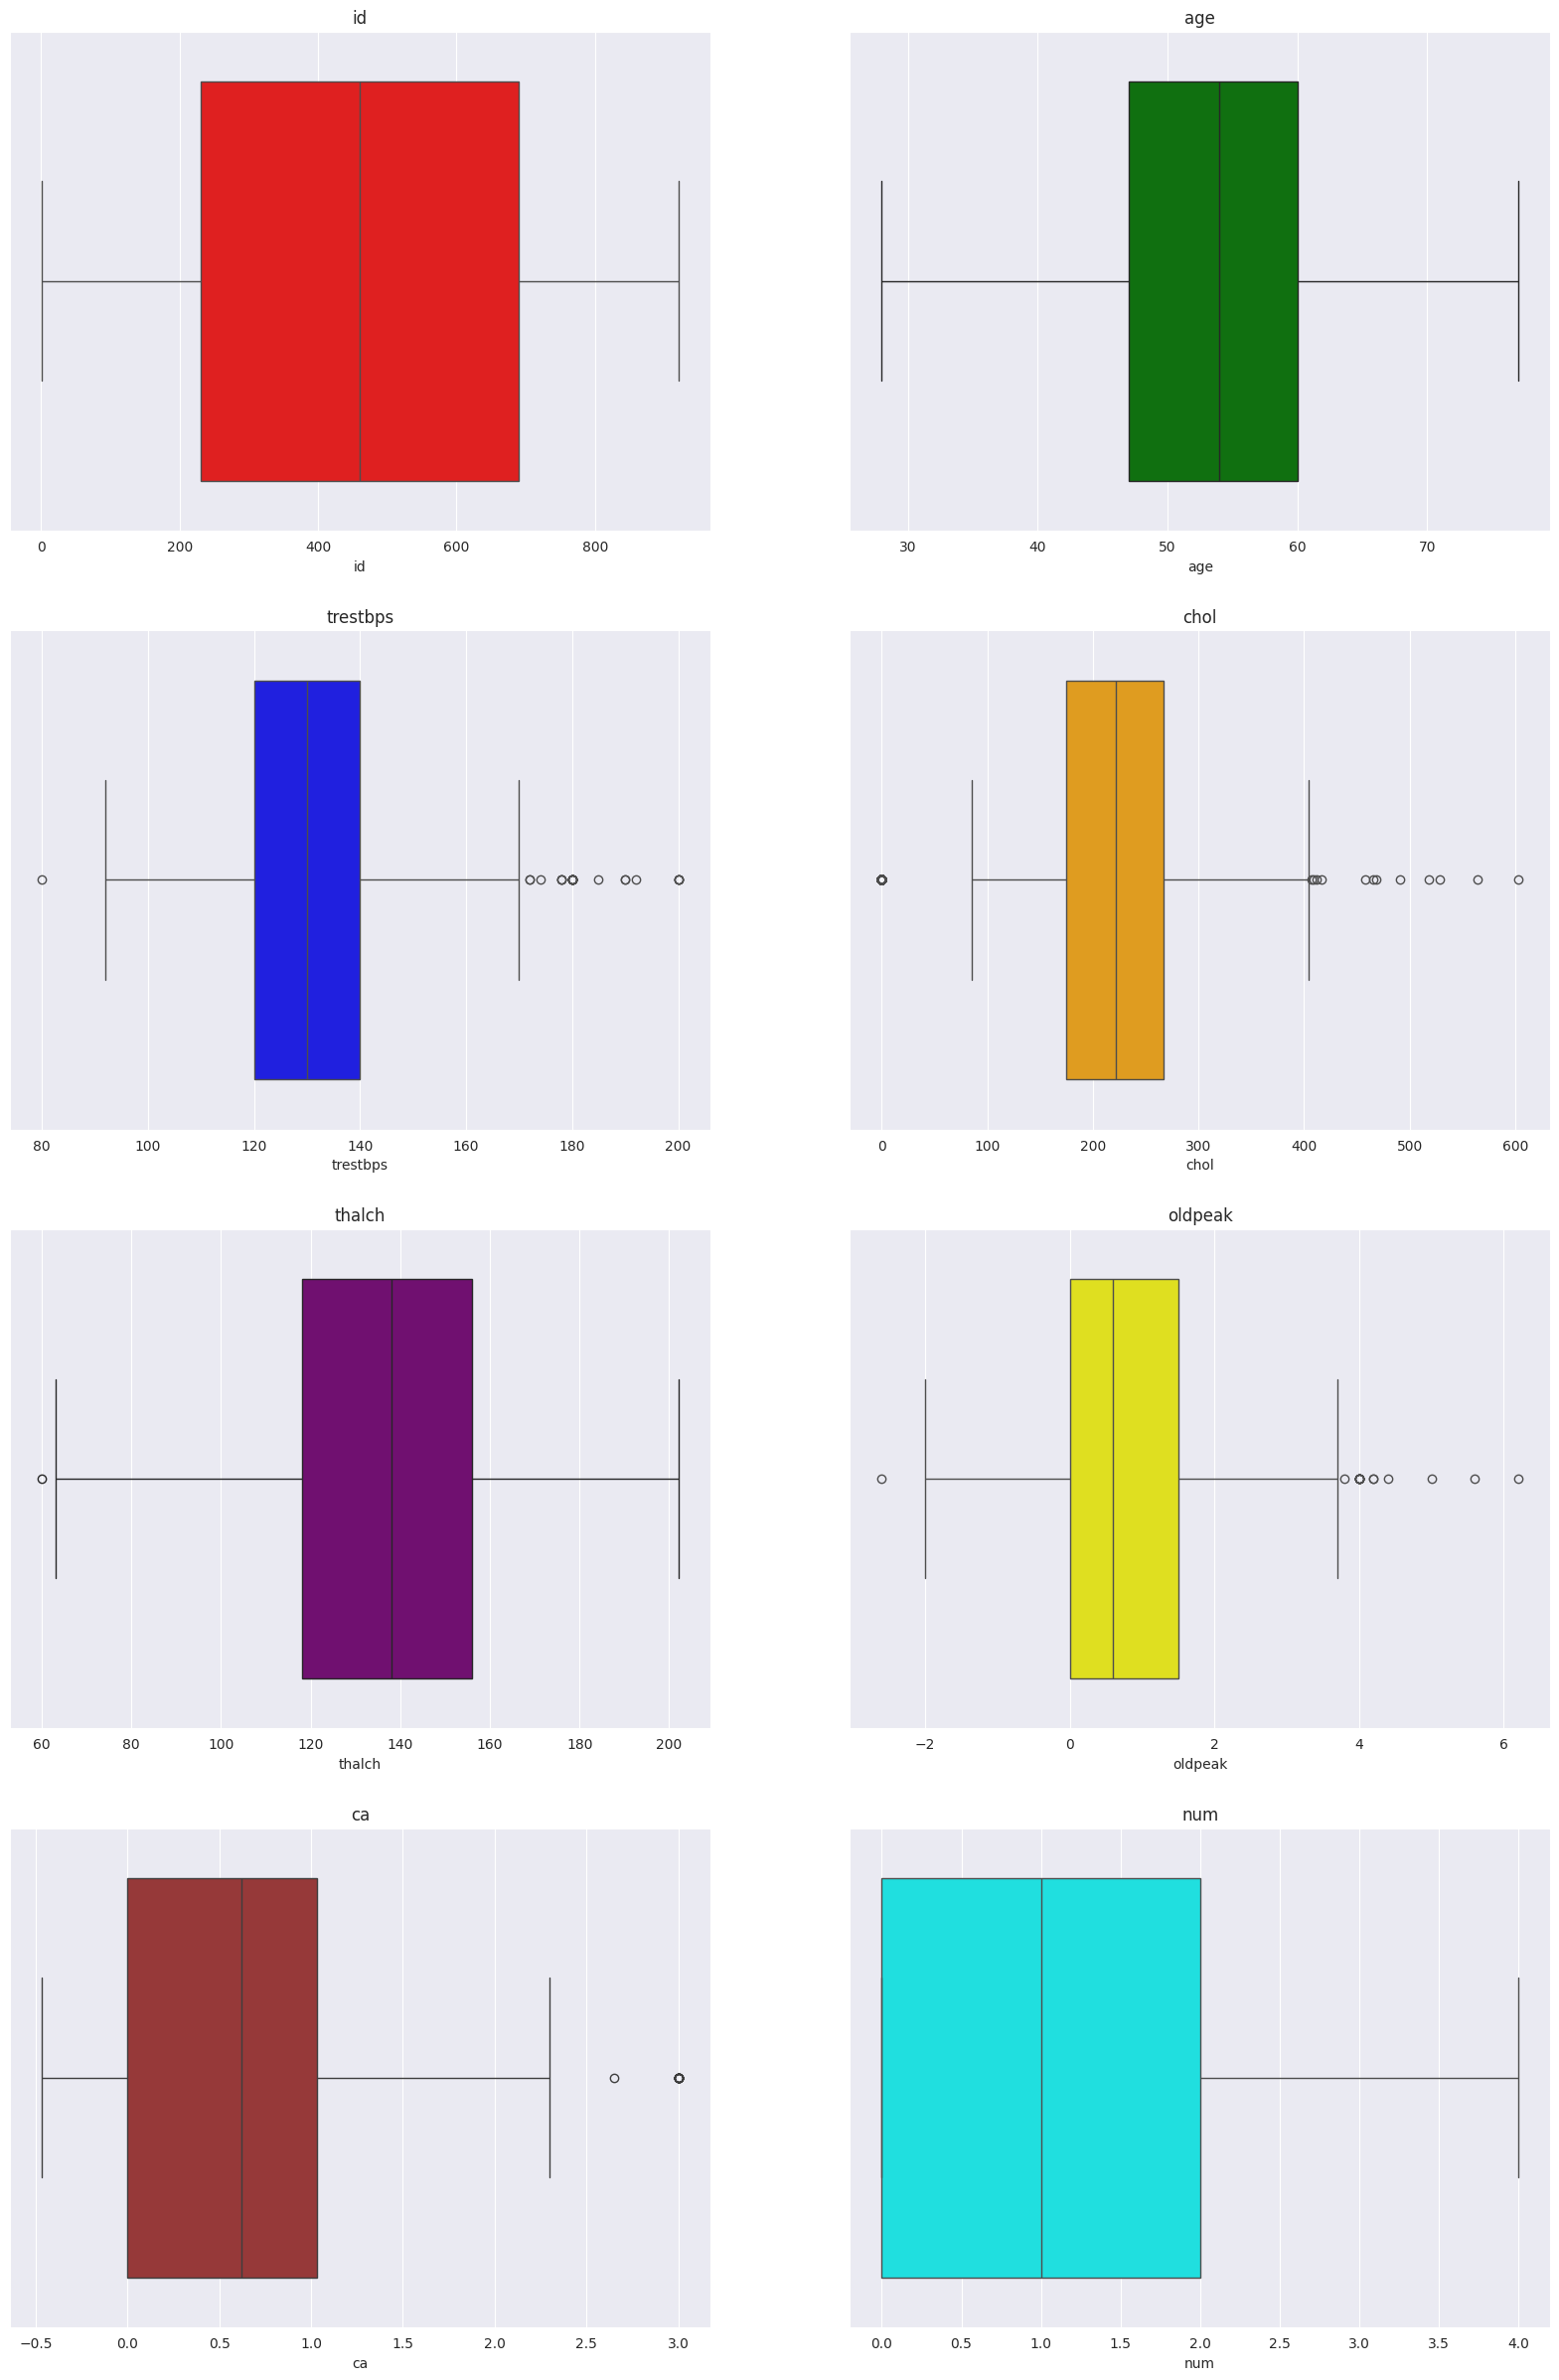

In [ ]:
# make Boxplot of numeric columns using for loop
plt.figure(figsize=(20, 30))

# Extend the colors list to have at least as many colors as num_cols
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'brown', 'cyan', 'magenta']

# Adjusted subplot grid to 4 rows, 2 columns to accommodate 8 plots
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)  # Changed to 4 rows, 2 columns
    sns.boxplot(x=df[col], color=colors[i % len(colors)]) # Use modulo operator to cycle through colors
    plt.title(col)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    float64
 1   age       919 non-null    float64
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    float64
dtypes: float64(8), object(8)
memory usage: 122.1+ KB


### ***Let's again Explore the dataset***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    float64
 1   age       919 non-null    float64
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    float64
dtypes: float64(8), object(8)
memory usage: 122.1+ KB


### ***Explore data based on Sex & Age***

In [ ]:
# Explore age column

df['age'].describe()

,age
count,919.000000
mean,53.509249
std,9.429689
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


*  ***Maximum age is 77***
*   ***Minimum age is 28***
* ***Mean is 53***





In [ ]:
df['age'].unique()

array([63., 67., 37., 41., 56., 62., 57., 53., 44., 52., 48., 54., 49.,
       64., 58., 60., 50., 66., 43., 40., 69., 59., 42., 55., 61., 65.,
       71., 51., 46., 45., 39., 68., 47., 34., 35., 29., 70., 77., 38.,
       74., 76., 28., 30., 31., 32., 33., 36., 72., 73., 75.])

In [ ]:
print(df['age'].value_counts().sort_values(ascending=False))

age
54.0    51
58.0    43
55.0    40
56.0    38
57.0    38
52.0    36
62.0    35
51.0    35
59.0    35
53.0    33
60.0    32
48.0    31
61.0    31
63.0    30
50.0    25
41.0    24
46.0    24
43.0    24
64.0    22
49.0    22
65.0    21
44.0    19
47.0    19
45.0    18
42.0    18
38.0    16
67.0    15
39.0    15
69.0    13
40.0    13
66.0    13
35.0    11
37.0    11
68.0    10
34.0     7
70.0     7
74.0     7
36.0     6
71.0     5
32.0     5
72.0     4
29.0     3
75.0     3
31.0     2
33.0     2
76.0     2
77.0     2
30.0     1
28.0     1
73.0     1
Name: count, dtype: int64


Mean 53.50924918389554
Median 54.0
Mode 0    54.0
Name: age, dtype: float64


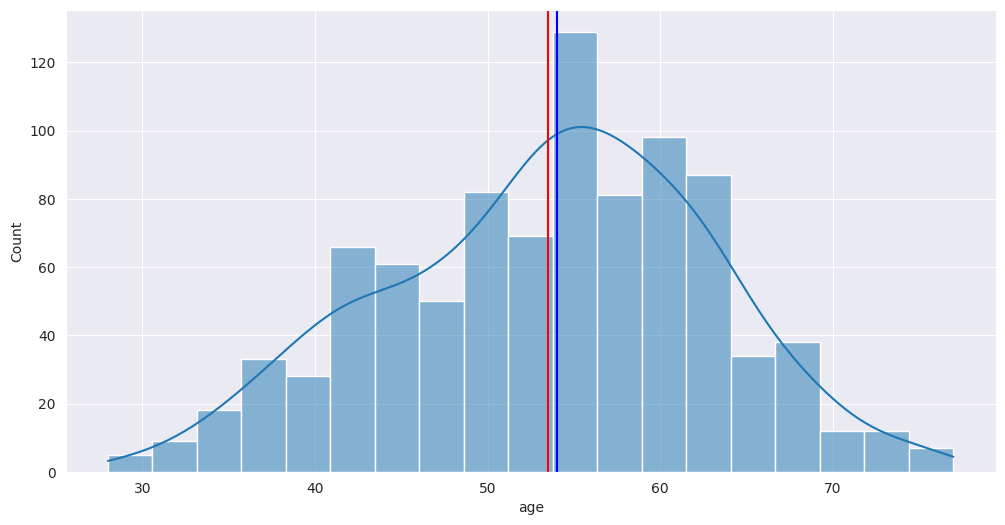

In [ ]:
# histplot of age using seaborn

fig = plt.figure(figsize=(12,6))
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(),color='red')
plt.axvline(df['age'].median(),color='green')
plt.axvline(df['age'].mode()[0],color='blue')

# print the values of mean, median & mode
print('Mean',df['age'].mean())
print('Median',df['age'].median())
print('Mode',df['age'].mode())

In [ ]:
df['sex'].value_counts()

,count
sex,
Male,725
Female,194


In [ ]:
print(df.groupby('sex')['age'].value_counts())

sex     age 
Female  54.0    15
        51.0    11
        62.0    10
        43.0     9
        48.0     9
                ..
Male    77.0     2
        28.0     1
        31.0     1
        33.0     1
        76.0     1
Name: count, Length: 91, dtype: int64


In [ ]:
# histplot of age having color by sex

fig = px.histogram(df,x='age',title='Age Distribution',color='sex')
fig.update_layout(width=1200, height=600)
fig.show()

* ***So most of the males & females in the age of 54-55 are affected by this.***
* ***Males are affected more than females.***

### ***Explore data based on Dataset & Sex***

In [ ]:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [ ]:
df['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,199
Switzerland,123


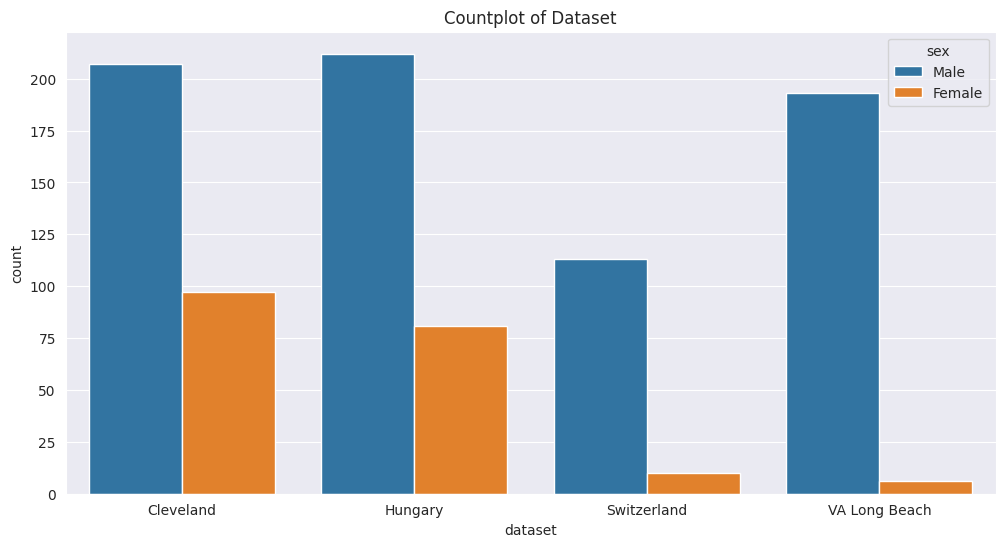

In [ ]:
# countplot of dataset

fig = plt.figure(figsize=(12,6))
sns.countplot(df,x ='dataset', hue='sex')
plt.title('Countplot of Dataset')
plt.show()

*   ***So, in the dataset cleveland has more patients (304)***
*   ***Switzerland has less patients (123)***
* ***Most males are from Hungary anf least from Switzerland.***
* ***Most females are from Cleveland and least from VA Long Beach	.***




### ***Explore the Age with dataset column***

In [ ]:
# histplot of age color by dataset

fig = px.histogram(df,x='age',title='<b><i>Age Distribution based on Dataset<i><b>',color='dataset')
fig.update_layout(width=1200, height=600)
fig.show()

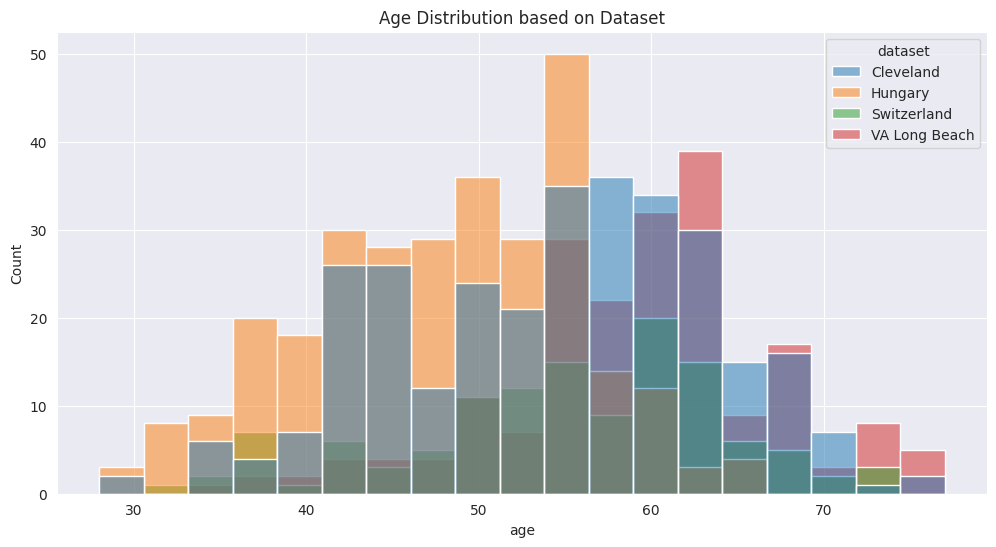

In [ ]:
# histplot using seaborn

fig = plt.figure(figsize=(12,6))
sns.histplot(df,x='age',hue='dataset')
plt.title('Age Distribution based on Dataset')
plt.show()

In [ ]:
# print mean, median and mode

print('Mean',df.groupby('dataset')['age'].mean())
print('-------------------')
print('Median',df.groupby('dataset')['age'].median())
print('-------------------')
print('Mode',df.groupby('dataset')['age'].agg(pd.Series.mode))


Mean dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.371859
Name: age, dtype: float64
-------------------
Median dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-------------------
Mode dataset
Cleveland                58.0
Hungary                  54.0
Switzerland              61.0
VA Long Beach    [62.0, 63.0]
Name: age, dtype: object


* ***Mean of the dataset column is different***
* ***Median is different***
* ***Mode is also different***

***So Mean, Median & Mode of dataset column (Cleveland, Hungary, Switzerland and VA Long Beach) is different***

### ***Explore CP (Chest Pain)***

In [ ]:
# value counts of cp

df['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,203
atypical angina,174
typical angina,46


In [ ]:
# histogram of co based on age

fig = px.histogram(df,x='age',title='CP Distribution',color='cp')
fig.update_layout(width=1200, height=600)
fig.show()

In [ ]:
# print mean, median and mode

print('Mean',df.groupby('cp')['age'].mean())
print('-------------------')
print('Median',df.groupby('cp')['age'].median())
print('-------------------')
print('Mode',df.groupby('cp')['age'].agg(pd.Series.mode))

Mean cp
asymptomatic       54.959677
atypical angina    49.241379
non-anginal        53.325123
typical angina     54.826087
Name: age, dtype: float64
-------------------
Median cp
asymptomatic       56.0
atypical angina    50.5
non-anginal        53.0
typical angina     59.0
Name: age, dtype: float64
-------------------
Mode cp
asymptomatic               57.0
atypical angina            54.0
non-anginal        [51.0, 54.0]
typical angina             62.0
Name: age, dtype: object


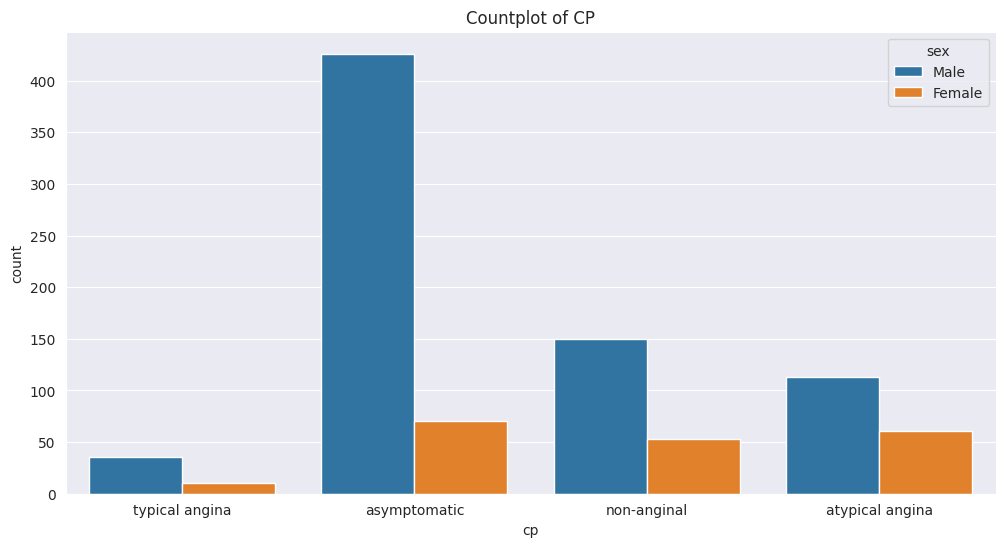

In [ ]:
# counplot of cp based on sex

fig = plt.figure(figsize=(12,6))
sns.countplot(df,x ='cp', hue='sex')
plt.title('Countplot of CP')
plt.show()

* ***Most Male and Female are affected by asymptomatic angina***
***Least Male and Female are affected by typical angina***

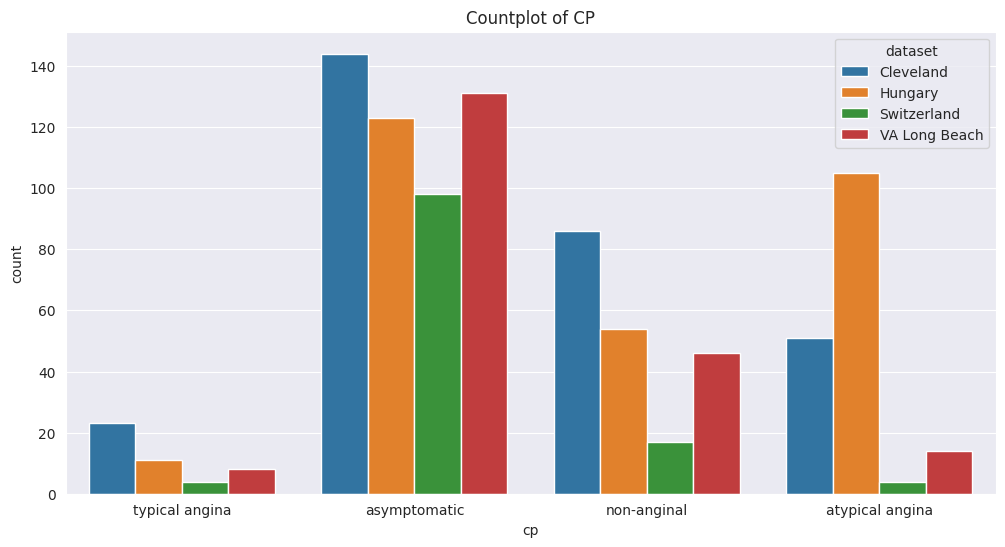

In [ ]:
# counplot of cp based on dataset

fig = plt.figure(figsize=(12,6))
sns.countplot(df,x ='cp', hue='dataset')
plt.title('Countplot of CP')
plt.show()

* ***Most of the asymptomatic patients are from Cleveland and least from Switzerland***
***Hungary has most atypical agina patients Switzerland has least***
***Cleveland, Hungary, Switzerland and VA Long Beach has least typical angina patients***

### ***Explore trestbps (Resting Blood Pressure)***

In [ ]:
# Value counts

df['trestbps'].value_counts()

,count
trestbps,
120.000000,131
130.000000,115
140.000000,102
110.000000,59
150.000000,56
...,...
138.504167,1
133.401031,1
135.977550,1


In [ ]:
# describe trestbps

df['trestbps'].describe()

,trestbps
count,919.000000
mean,132.550495
std,18.003627
min,80.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [ ]:
# histplot of trestbps based on sex

fig = px.histogram(df,x='trestbps',title='Resting Blood Pressure',color='sex')
fig.update_layout(width=1200, height=600)
fig.show()

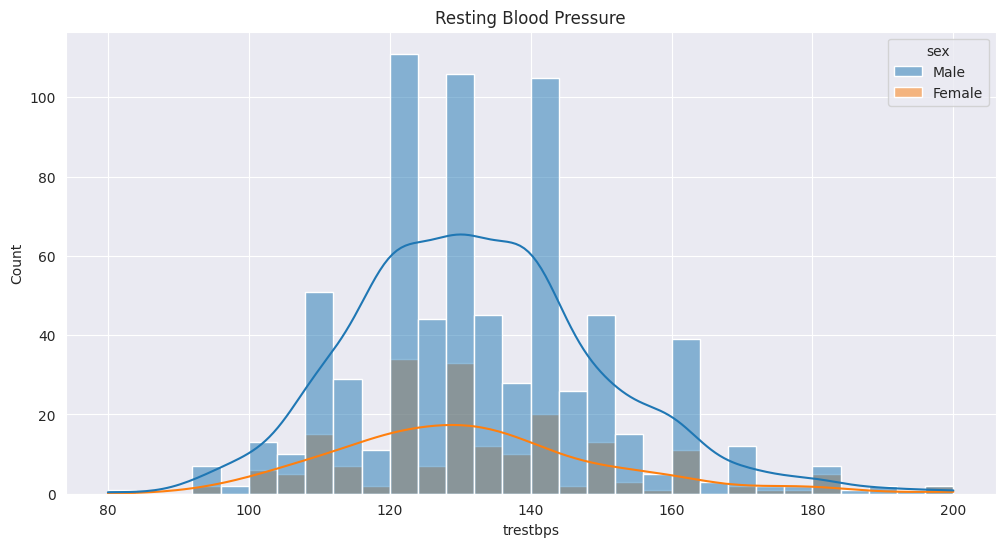

In [ ]:
# histplot of trestbps based on sex using seaborn

fig = plt.figure(figsize=(12,6))
sns.histplot(df,x='trestbps',hue='sex',kde = True)
plt.title('Resting Blood Pressure')
plt.show()

***This shows the distribution of `trestbps` based on `sex`***

### ***Explore Chol (Cholestrol)***

In [ ]:
# Value counts

df['chol'].value_counts()

,count
chol,
0.000000,171
220.000000,10
254.000000,10
216.000000,9
211.000000,9
...,...
358.000000,1
233.872165,1
212.815358,1


In [ ]:
# describe chol

df['chol'].describe()

,chol
count,919.000000
mean,199.010658
std,109.015820
min,0.000000
25%,175.009775
50%,222.000000
75%,267.000000
max,603.000000


In [ ]:
# histplot of chol based on sex

fig = px.histogram(df,x='chol',title='Cholestrol',color='sex')
fig.update_layout(width=1200, height=600)
fig.show()

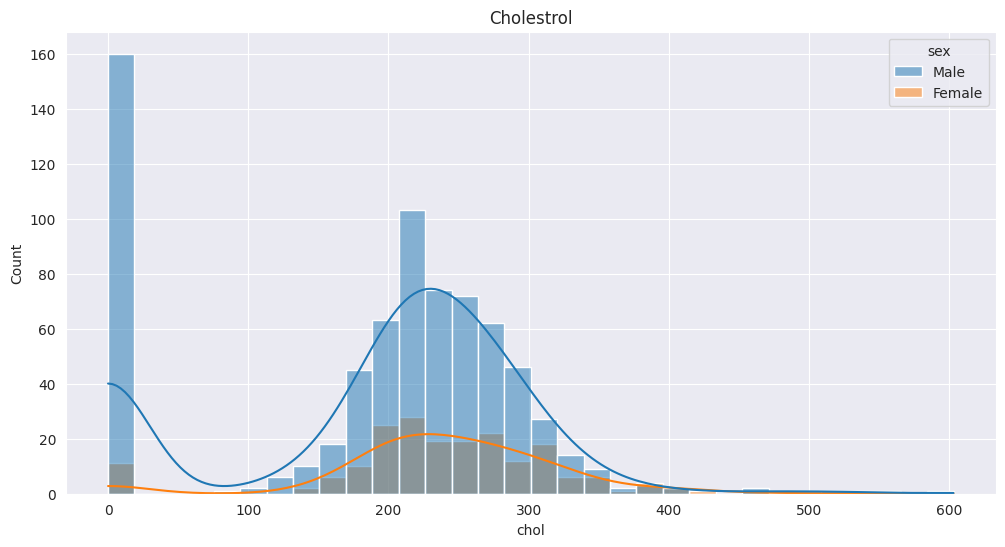

In [ ]:
# histplot of chol based on sex using seaborn

fig = plt.figure(figsize=(12,6))
sns.histplot(df,x='chol',hue='sex',kde = True)
plt.title('Cholestrol')
plt.show()

***This shows that chol is not normally distributed***

### ***Explore fbs (Fasting Blood Sugar)***

In [ ]:
# Value Counts

df['fbs'].value_counts()

,count
fbs,
False,781
True,138


In [ ]:
# histplot of fbs based on sex

fig = px.histogram(df,x='fbs',title='Fasting Blood Sugar',color='sex')
fig.update_layout(width=1200, height=600)
fig.show()

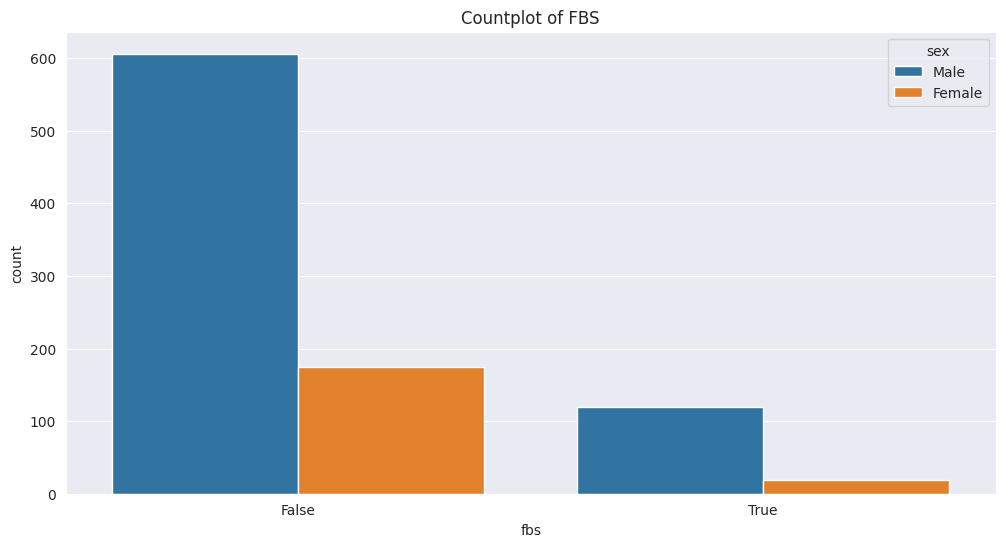

In [ ]:
# Countplot of fbs

fig = plt.figure(figsize=(12,6))
sns.countplot(df,x ='fbs', hue='sex')
plt.title('Countplot of FBS')
plt.show()

***This shows that most males & females have no fbs***

### ***Explore restecg (Resting Electrocardiographic Results)***

In [ ]:
# Value Counts

df['restecg'].value_counts()

,count
restecg,
normal,552
lv hypertrophy,188
st-t abnormality,179


In [ ]:
# histplot of restecg based on sex

fig = px.histogram(df,x='restecg',title='Resting Electrocardiographic Results ',color='sex')
fig.update_layout(width=1200, height=600)
fig.show()

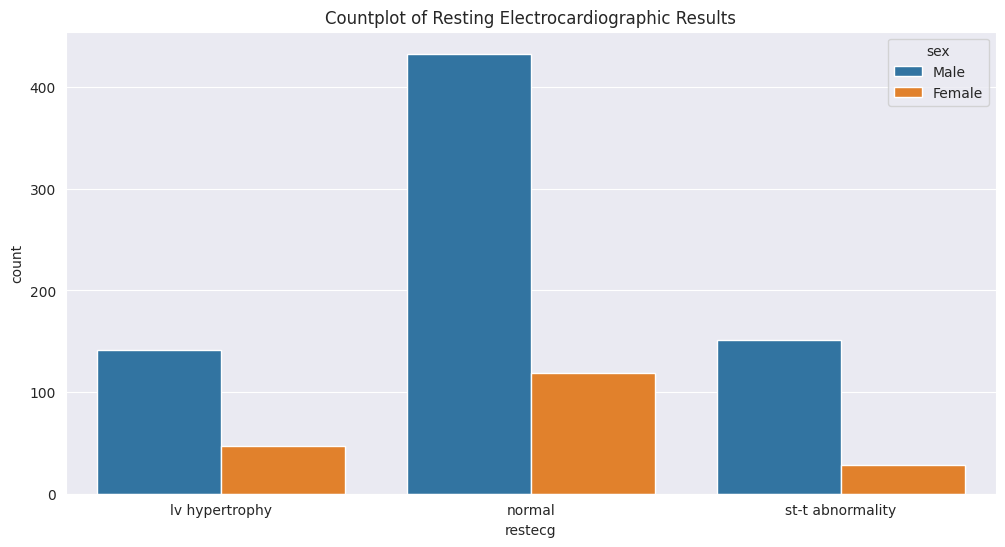

In [ ]:
# Countplot of fbs

fig = plt.figure(figsize=(12,6))
sns.countplot(df,x ='restecg', hue='sex')
plt.title('Countplot of Resting Electrocardiographic Results')
plt.show()

* ***Most males & females have `normal` restecg***
* ***Females have least `st-t abnormality`***

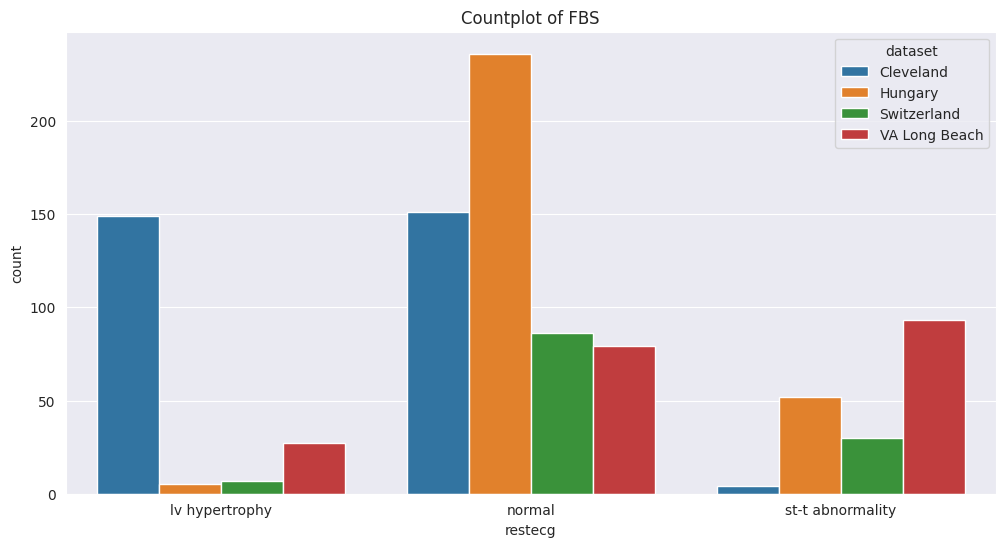

In [ ]:
# Countplot of fbs

fig = plt.figure(figsize=(12,6))
sns.countplot(df,x ='restecg', hue='dataset')
plt.title('Countplot of FBS')
plt.show()

* ***Most of the patients from all dataset (Cleveland, Hungary, Switzerland & VA Long Beach) have `normal` restecg***
* ***Cleveland has most Iv `hypertrophy` patients***
* ***VA Long Beach has more `st-t abnormality` patients***

### ***Explore thalch (Maximum Heart Rate Achieved)***

In [ ]:
# Value Counts

df['thalch'].value_counts()

,count
thalch,
150.000000,43
140.000000,41
120.000000,35
130.000000,30
160.000000,26
...,...
117.046929,1
117.615291,1
122.744799,1


In [ ]:
# describe

df['thalch'].describe()

,thalch
count,919.000000
mean,136.346843
std,25.658885
min,60.000000
25%,118.000000
50%,138.000000
75%,156.000000
max,202.000000


In [ ]:
# histplot of thalch based on sex

fig = px.histogram(df,x='thalch',title='Maximum Heart Rate Achieved',color='sex')
fig.update_layout(width=1200, height=600)
fig.show()


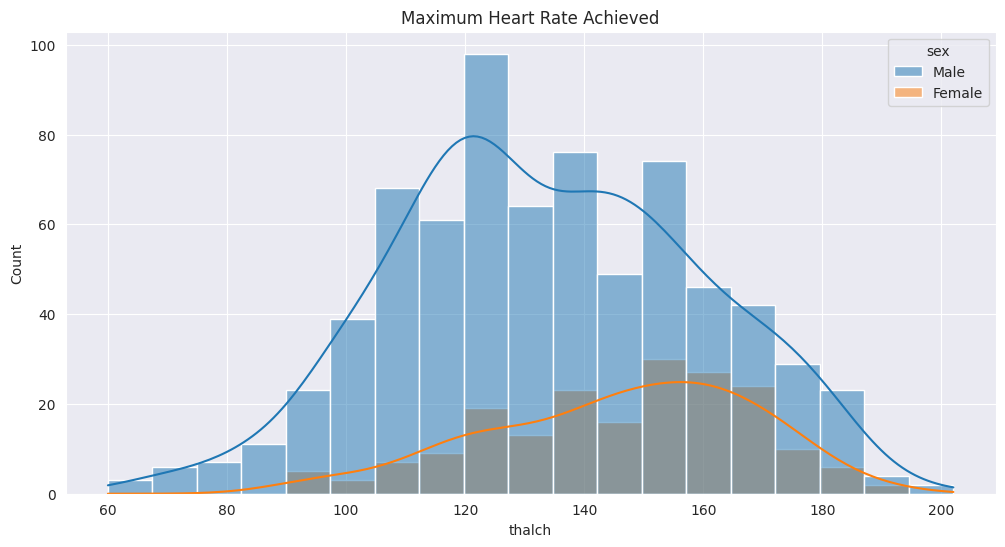

In [ ]:
# histplot of thalch based on sex using seaborn

fig = plt.figure(figsize=(12,6))
sns.histplot(df,x='thalch',hue='sex',kde = True)
plt.title('Maximum Heart Rate Achieved')
plt.show()

* ***This shows that it is not normally distributed***

### ***Explore exang (Exercise-Induced Angina)***

In [ ]:
# Value Counts

df['exang'].value_counts()

,count
exang,
False,545
True,374


In [ ]:
# histplot of exang based on sex

fig = px.histogram(df,x='exang',title='Exercise-Induced Angina',color='sex')
fig.update_layout(width=1200, height=600)
fig.show()

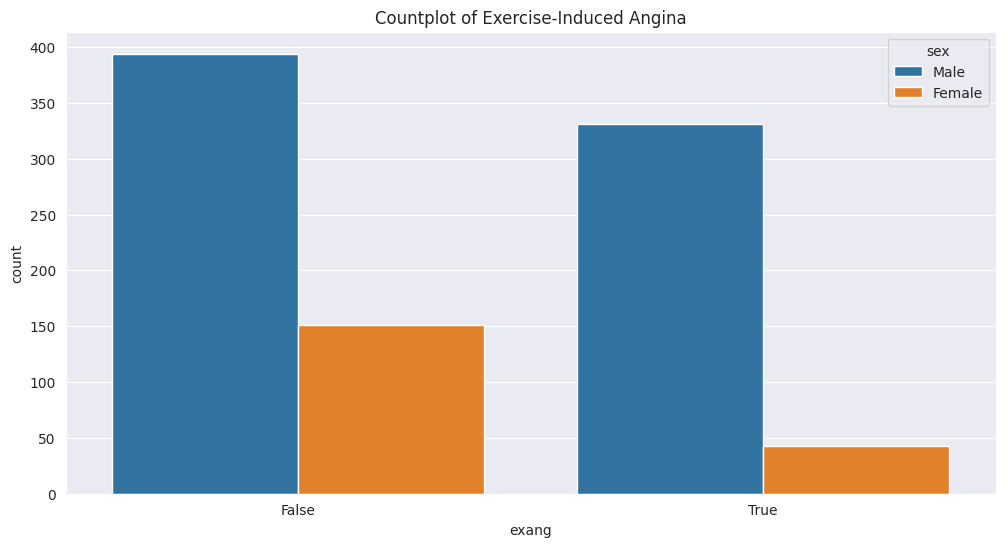

In [ ]:
# Countplot of exang based on sex

fig = plt.figure(figsize=(12,6))
sns.countplot(df,x ='exang', hue='sex')
plt.title('Countplot of Exercise-Induced Angina')
plt.show()

* ***Most males anf females have false exang***

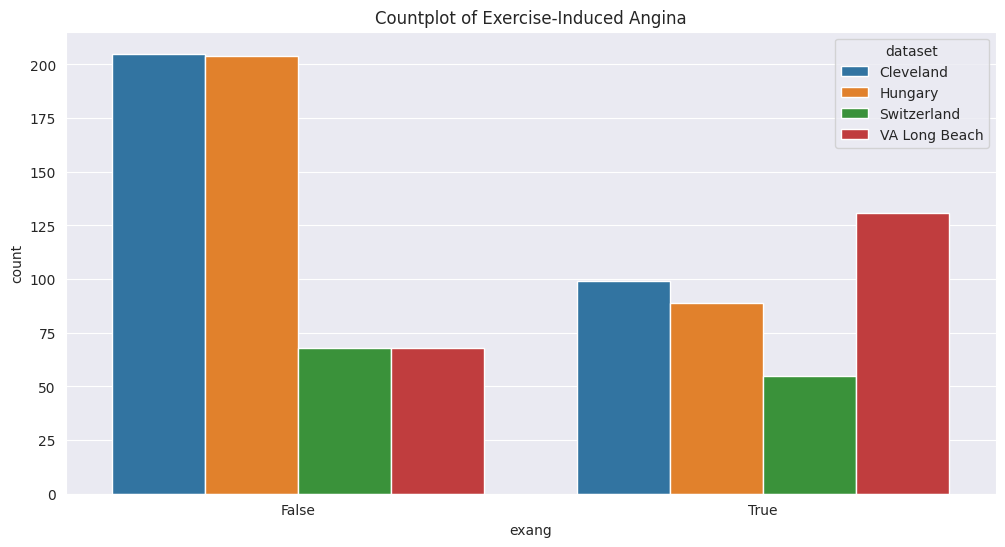

In [ ]:
# Countplot of exang based on dataset

fig = plt.figure(figsize=(12,6))
sns.countplot(df,x ='exang', hue='dataset')
plt.title('Countplot of Exercise-Induced Angina')
plt.show()

* ***VA Long Beach has more true `exang` patients and Switzerland has least true exang patients***
* ***Cleveland and Hungary has most false exang patients***

### ***Explore oldpeak (Depression)***

In [ ]:
# Value Counts

df['oldpeak'].value_counts()

,count
oldpeak,
0.000000,370
1.000000,83
2.000000,76
1.500000,47
3.000000,28
...,...
0.929235,1
0.456312,1
0.701947,1


In [ ]:
# describe

df['oldpeak'].describe()

,oldpeak
count,919.000000
mean,0.890296
std,1.066356
min,-2.600000
25%,0.000000
50%,0.600000
75%,1.500000
max,6.200000


In [ ]:
# histplot of oldpeak based on sex

fig = px.histogram(df,x='oldpeak',title='Depression',color='sex')
fig.update_layout(width=1200, height=600)
fig.show()

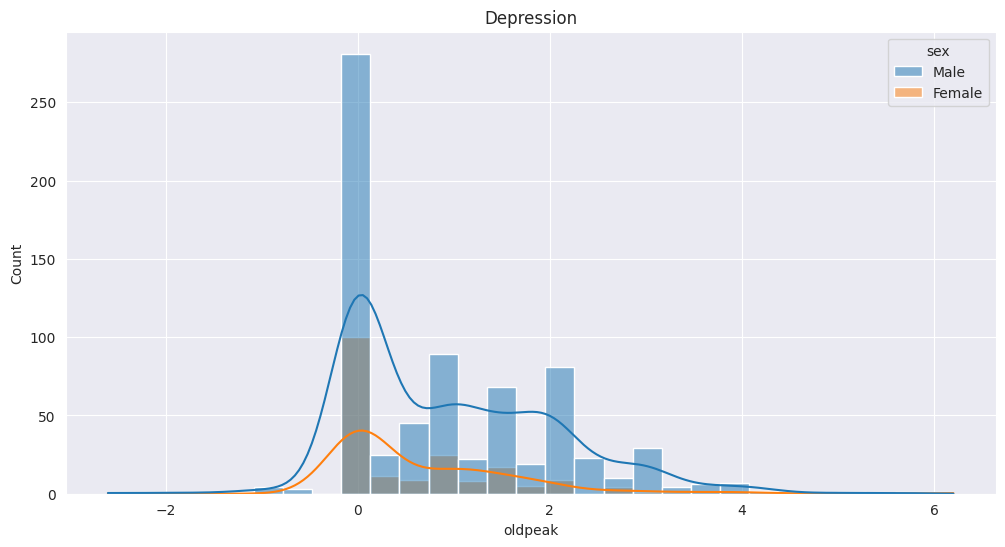

In [ ]:
# histplot of oldpeak based on sex using seaborn

fig = plt.figure(figsize=(12,6))
sns.histplot(df,x='oldpeak',hue='sex',kde = True)
plt.title('Depression')
plt.show()

* ***This shows that it is not normally distributed***

### ***Explore slope (Slope of the peak exercise ST segment)***

In [ ]:
# Value Counts

df['slope'].value_counts()

,count
slope,
flat,516
upsloping,335
downsloping,68


In [ ]:
# histplot of slope based on sex

fig = px.histogram(df,x='slope',title='Slope of the peak exercise ST segment',color='sex')
fig.update_layout(width=1200, height=600)
fig.show()

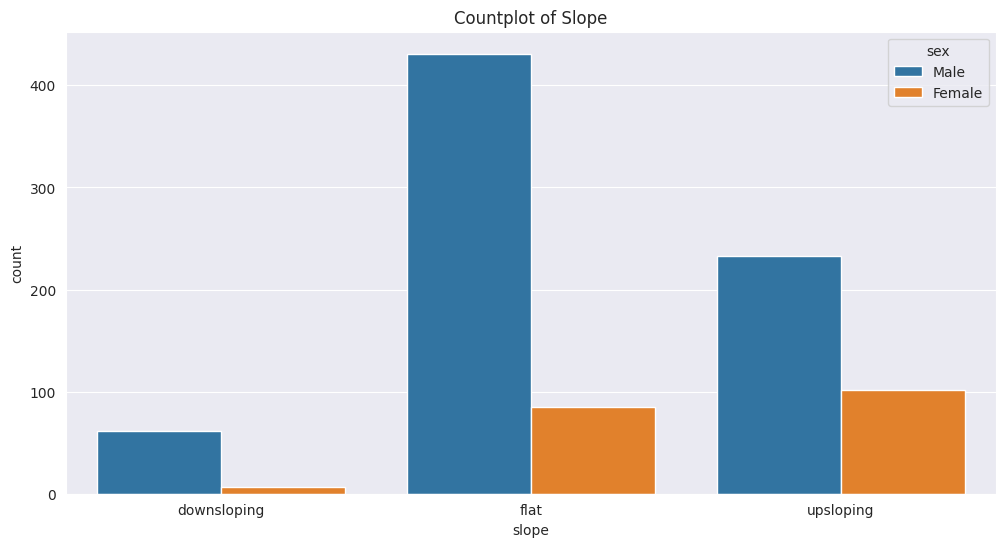

In [ ]:
# Countplot of slope

fig = plt.figure(figsize=(12,6))
sns.countplot(df,x ='slope', hue='sex')
plt.title('Countplot of Slope')
plt.show()

* ***Males have more `flat slope` and least` doensloping slope`***
* ***Females have more `upsloping slope` and least `doensloping slope`***

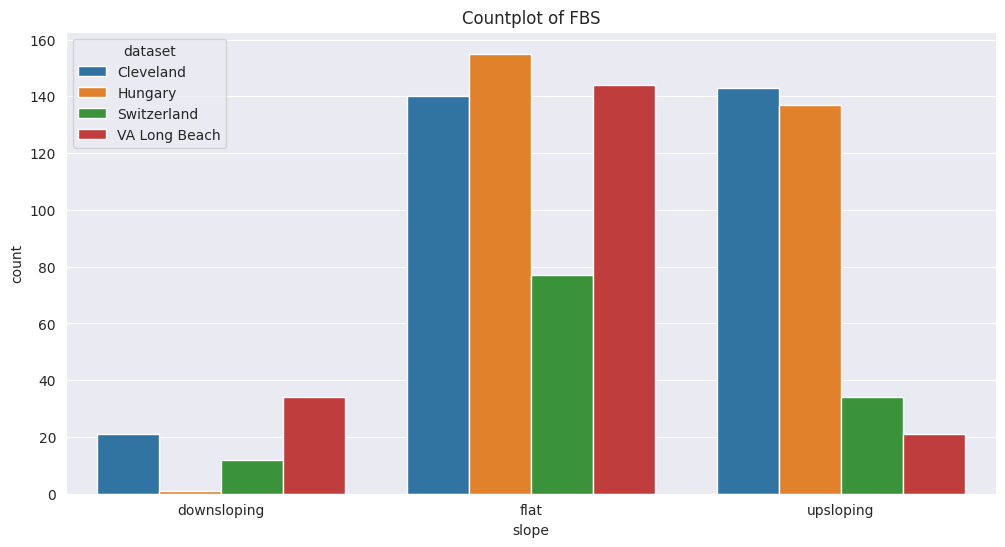

In [ ]:
# Countplot of slope

fig = plt.figure(figsize=(12,6))
sns.countplot(df,x ='slope', hue='dataset')
plt.title('Countplot of FBS')
plt.show()

* ***Hungary, Cleveland & VA LongBeach have more `falt slope` patients***
* ***Hungary has least `doensloping` patients***

### ***Explore ca (Coronary Artery Calcification)***
***Coronary artery calcification is a buildup of calcium that can predict your cardiovascular risk. Symptoms like chest pain usually don’t happen until you’ve had it for a while. There are two main forms of coronary artery disease: stable ischemic heart disease and acute coronary syndrome.***


In [ ]:
# Value Counts

df['ca'].value_counts()

,count
ca,
0.000000,181
1.000000,67
2.000000,41
3.000000,20
0.744965,1
...,...
0.404891,1
0.569651,1
0.491895,1


In [ ]:
# describe

df['ca'].describe()

,ca
count,919.000000
mean,0.719389
std,0.714032
min,-0.467855
25%,0.000000
50%,0.620961
75%,1.030788
max,3.000000


In [ ]:
# histplot of ca based on sex

fig = px.histogram(df,x='ca',title='Coronary Artery Calcification',color='sex')
fig.update_layout(width=1200, height=600)
fig.show()

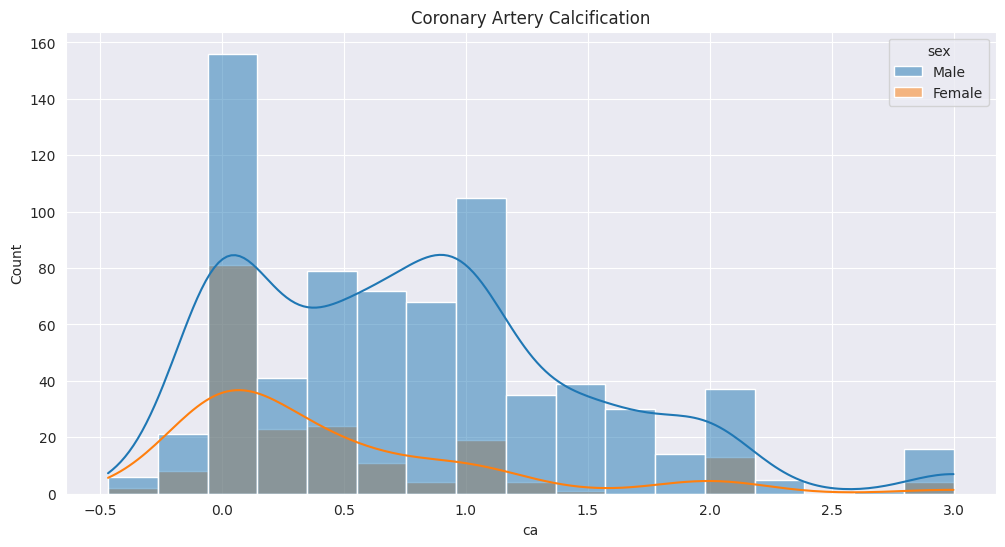

In [ ]:
# histplot of ca based on sex using seaborn

fig = plt.figure(figsize=(12,6))
sns.histplot(df,x='ca',hue='sex',kde = True)
plt.title('Coronary Artery Calcification')
plt.show()


* ***This shows that it is not normally distributed***

### ***Explore thal (Thalassemia)***

In [ ]:
# Value Counts

df['thal'].value_counts()


,count
thal,
reversable defect,531
normal,316
fixed defect,72


In [ ]:
# histplot of thal based on sex

fig = px.histogram(df,x='thal',title='Thalassemia',color='sex')
fig.update_layout(width=1200, height=600)
fig.show()


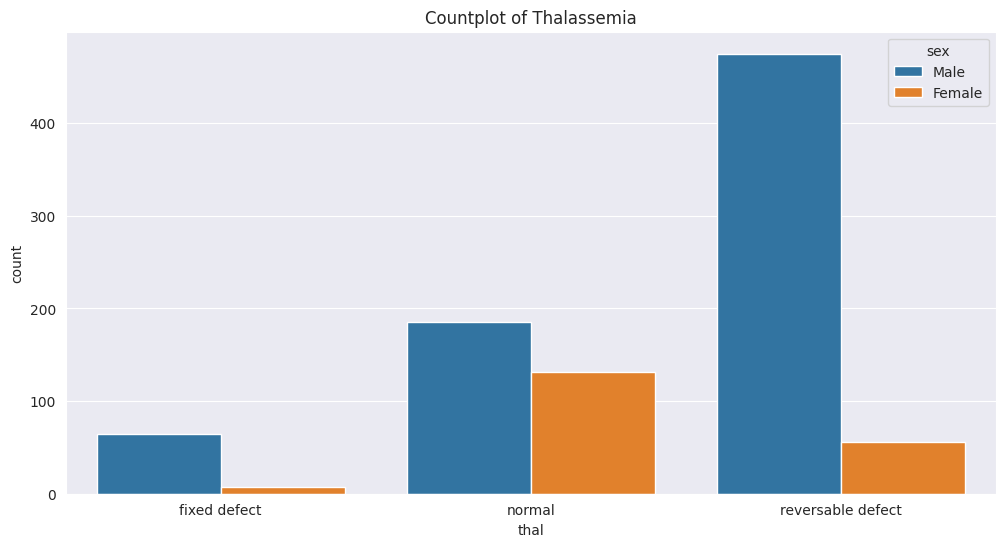

In [ ]:
# Countplot of thal

fig = plt.figure(figsize=(12,6))
sns.countplot(df,x ='thal', hue='sex')
plt.title('Countplot of Thalassemia')
plt.show()

* ***Most males have `Thalassemia (Reversible Defect)`***
* ***Most females have `Thalassemia (Normal)`***
* ***Both males & females have least `Thalassemia (Fixed Defect)`***

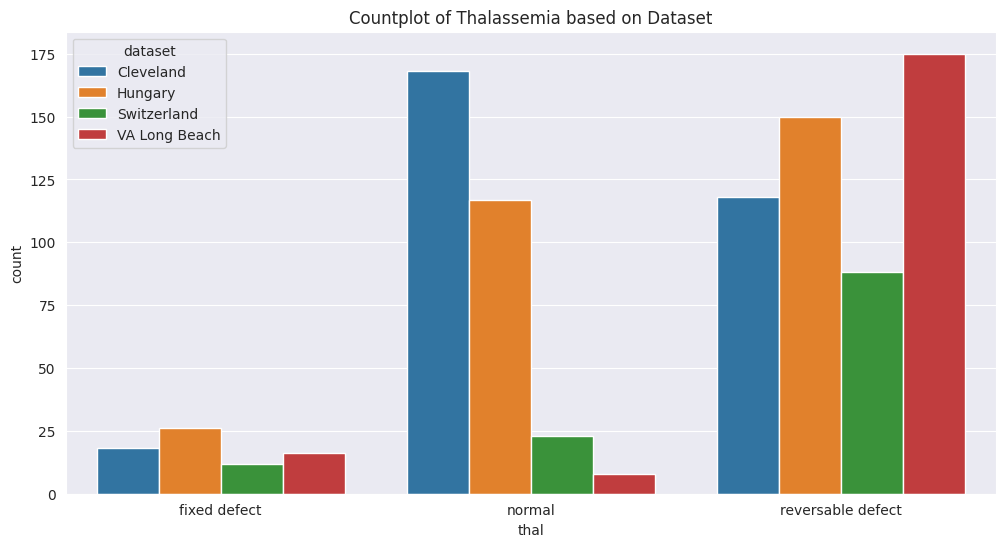

In [ ]:
# Countplot of thal

fig = plt.figure(figsize=(12,6))
sns.countplot(df,x ='thal', hue='dataset')
plt.title('Countplot of Thalassemia based on Dataset')
plt.show()

* ***VA Long Beach has most Thalassemia (Reversible defect) patients***
* ***Cleveland has most Thalassemia (Normal) patients***
* ***VA Long Beach has least Thalassemia (Normal) patients***



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    float64
 1   age       919 non-null    float64
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    float64
dtypes: float64(8), object(8)
memory usage: 122.1+ KB


### ***Explore num***
***NUM specified whether a patient has the presence or absence of heart disease.A score of 120/80 is optimal, and 140/90 is normal for most people. Higher readings mean that arteries aren’t responding right to the force of blood pushing against artery walls (blood pressure), directly raising the risk of heart attack or stroke.***

In [ ]:
# Value Counts

df['num'].value_counts()

,count
num,
0.0,411
1.0,265
2.0,109
3.0,106
4.0,28


In [ ]:
# describe

df['num'].describe()

,num
count,919.000000
mean,0.993471
std,1.141398
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,4.000000


In [ ]:
# histplot of num based on sex

fig = px.histogram(df,x='num',title='Heart Disease',color='sex')
fig.update_layout(width=1200, height=600)
fig.show()

## ***Apply Machine Learning***
***We predict our target value `num` & use this column to predict heart disease.***

***Num has 5 values `0, 1, 2, 3, 4` which states five types of heart disease***

In [ ]:
# Split data into X and y

X = df.drop('num',axis=1)
y = df['num']

In [ ]:
# Categorical Columns

cat_cols

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [ ]:
# label encode categorical variables

le = LabelEncoder()
X['sex'] = le.fit_transform(X['sex'])
X['dataset'] = le.fit_transform(X['dataset'])
X['cp'] = le.fit_transform(X['cp'])
X['fbs'] = le.fit_transform(X['fbs'])
X['restecg'] = le.fit_transform(X['restecg'])
X['exang'] = le.fit_transform(X['exang'])
X['slope'] = le.fit_transform(X['slope'])
X['thal'] = le.fit_transform(X['thal'])



In [ ]:
# Train Test the data

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [ ]:
# Create a dictionaries of list of models to evaluate performance
models = {
          'LogisticRegression' : LogisticRegression(random_state=42),
          'SVC' : SVC(random_state=42),
          'DecisionTreeClassifier' :DecisionTreeClassifier(random_state=42),
          'RandomForestClassifier' :RandomForestClassifier(random_state=42),
          'KNeighborsClassifier' : KNeighborsClassifier(),
          'GradientBoostingClassifier' : GradientBoostingClassifier(random_state=42),
          'XGBClassifier' : XGBClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
          'GaussianNB': GaussianNB(), # Changed to only the model
          'LGBMClassifier': LGBMClassifier(verbose =-1, random_state=42),
          'CatBoostClassifier': CatBoostClassifier(verbose=0, random_state=42)
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models

model_scores = []
for name, model in models.items():
    # fit each model from models on training data
    model.fit(X_train, y_train)

    # make prediction from each model
    y_pred = model.predict(X_test)
    metric = mean_absolute_error(y_test, y_pred)
    model_scores.append((name, metric))

    # print the performing metric
    print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    print(name, 'R2: ', r2_score(y_test, y_pred))
    print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    print('\n')

# selecting the best model from all above models with evaluation metrics sorting method
refine_models = sorted(model_scores, key=lambda x: x[1], reverse=False)
for model in refine_models:
    print('Mean absolute error for', f"{model[0]} is {model[1]: .2f}")

LogisticRegression MSE:  1.4456521739130435
LogisticRegression R2:  -0.17801097525753318
LogisticRegression MAE:  0.7608695652173914


SVC MSE:  1.4619565217391304
SVC R2:  -0.19129681332434756
SVC MAE:  0.7010869565217391


DecisionTreeClassifier MSE:  0.6304347826086957
DecisionTreeClassifier R2:  0.486280928083181
DecisionTreeClassifier MAE:  0.391304347826087


RandomForestClassifier MSE:  0.5815217391304348
RandomForestClassifier R2:  0.5261384422836238
RandomForestClassifier MAE:  0.3532608695652174


KNeighborsClassifier MSE:  1.625
KNeighborsClassifier R2:  -0.3241551939924905
KNeighborsClassifier MAE:  0.7336956521739131


GradientBoostingClassifier MSE:  0.5434782608695652
GradientBoostingClassifier R2:  0.5571387311061905
GradientBoostingClassifier MAE:  0.33695652173913043


XGBClassifier MSE:  0.5380434782608695
XGBClassifier R2:  0.5615673437951286
XGBClassifier MAE:  0.3423913043478261


AdaBoostClassifier MSE:  0.7119565217391305
AdaBoostClassifier R2:  0.41985173774910

## ***Hyperparamter Tuning***

In [ ]:
# Create a dictionaries of list of models to evaluate performance

models = {
          'LogisticRegression' : (LogisticRegression(random_state=42),{'model__penalty': ['l1', 'l2'],'model__C': [0.001, 0.1, 1],'model__solver': ['liblinear', 'saga']}),
          'SVC' : (SVC(random_state=42), {'model__kernel': ['linear'],'model__degree': [2]}),
          'DecisionTreeClassifier' :(DecisionTreeClassifier(random_state=42), {'model__max_depth': [None, 5, 10], 'model__splitter': ['best', 'random']}),
          'RandomForestClassifier' :(RandomForestClassifier(random_state=42), {'model__n_estimators': [10, 100, 1000], 'model__max_depth': [None, 5, 10]}),
          'KNeighborsClassifier' : (KNeighborsClassifier(), {'model__n_neighbors': np.arange(3, 100, 2), 'model__weights': ['uniform', 'distance']}),
          'GaussianNB':( GaussianNB(),{'model__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}),
          'GradientBoostingClassifier' : (GradientBoostingClassifier(random_state=42), {'model__loss': ['log_loss', 'exponential'], 'model__n_estimators': [10, 100, 1000]}),
          'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'model__n_estimators': [10, 100, 1000], 'model__learning_rate': [0.1, 0.01, 0.001]}),
          'LGBMClassifier': (LGBMClassifier(max_depth=10,min_data_in_leaf=20,num_leaves=31,learning_rate=0.01,n_estimators=200,lambda_l1=0.1,lambda_l2=0.1,boosting_type='gbdt' ), {}),
          'CatBoostClassifier': (CatBoostClassifier(verbose=0, random_state=42), {'model__iterations': [100, 500, 1000], 'model__learning_rate': [0.01, 0.1, 1.0]}),
          #'XGBClassifier' : (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {}),
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models

for name, (model, params) in models.items():
    # create a pipline with preprocessor
    pipeline = Pipeline(steps=[('model', model)])

    # make a grid search cv to tune the hyperparameter
    grid_search = GridSearchCV(pipeline, params, cv=5)


    # fit the pipeline
    grid_search.fit(X_train, y_train)

    # make prediction from each model
    y_pred = grid_search.predict(X_test)


    # print the performing metric
    print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    print(name, 'R2: ', r2_score(y_test, y_pred))
    print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    print('\n')

# selecting the best model from all above models with evaluation metrics sorting method
filter_model = sorted(model_scores, key=lambda x: x[1], reverse=False)
for model in filter_model:
    print('Mean absolute error for', f"{model[0]} is {model[1]: .2f}")

LogisticRegression MSE:  0.75
LogisticRegression R2:  0.3888514489265429
LogisticRegression MAE:  0.4891304347826087


SVC MSE:  0.5869565217391305
SVC R2:  0.5217098295946858
SVC MAE:  0.3695652173913043


DecisionTreeClassifier MSE:  0.532608695652174
DecisionTreeClassifier R2:  0.5659959564840666
DecisionTreeClassifier MAE:  0.34782608695652173


RandomForestClassifier MSE:  0.5434782608695652
RandomForestClassifier R2:  0.5571387311061905
RandomForestClassifier MAE:  0.358695652173913


KNeighborsClassifier MSE:  1.4891304347826086
KNeighborsClassifier R2:  -0.21343987676903797
KNeighborsClassifier MAE:  0.7065217391304348


GaussianNB MSE:  0.7934782608695652
GaussianNB R2:  0.3534225474150381
GaussianNB MAE:  0.532608695652174


GradientBoostingClassifier MSE:  0.5434782608695652
GradientBoostingClassifier R2:  0.5571387311061905
GradientBoostingClassifier MAE:  0.33695652173913043


AdaBoostClassifier MSE:  0.7282608695652174
AdaBoostClassifier R2:  0.4065658996822953
AdaBoostCl

In [ ]:
# Create a dictionaries of list of models to evaluate performance

models = {
    'LogisticRegression': (LogisticRegression(random_state=42), {'model__penalty': ['l1', 'l2'],'model__C': [0.001, 0.1, 1],'model__solver': ['liblinear', 'saga']}),
    'SVC': (SVC(random_state=42), {'model__kernel': ['linear'],'model__degree': [2]}),
    'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=42), {'model__max_depth': [None, 5, 10], 'model__splitter': ['best', 'random']}),
    'RandomForestClassifier': (RandomForestClassifier(random_state=42), {'model__n_estimators': [10, 100, 1000], 'model__max_depth': [None, 5, 10]}),
    'KNeighborsClassifier': (KNeighborsClassifier(), {'model__n_neighbors': np.arange(3, 100, 2), 'model__weights': ['uniform', 'distance']}),
    'GaussianNB': (GaussianNB(), {'model__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}),
    'GradientBoostingClassifier': (GradientBoostingClassifier(random_state=42), {'model__loss': ['log_loss', 'exponential'], 'model__n_estimators': [10, 100, 1000]}),
    'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'model__n_estimators': [10, 100, 1000], 'model__learning_rate': [0.1, 0.01, 0.001]}),
    'LGBMClassifier': (LGBMClassifier(max_depth=10,min_data_in_leaf=20,num_leaves=31,learning_rate=0.01,n_estimators=200,lambda_l1=0.1,lambda_l2=0.1,boosting_type='gbdt'), {}),
    'CatBoostClassifier': (CatBoostClassifier(verbose=0, random_state=42), {'model__iterations': [100, 500, 1000], 'model__learning_rate': [0.01, 0.1, 1.0]}),
    # 'XGBClassifier': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {}),
}

results = []

# Train and predict each model with evaluation metrics
for name, (model, params) in models.items():
    # Create a pipeline with the model
    pipeline = Pipeline(steps=[('model', model)])

    # Create a grid search CV to tune the hyperparameters
    grid_search = GridSearchCV(pipeline, params, cv=5)

    # Fit the pipeline
    grid_search.fit(X_train, y_train)

    # Make predictions
    y_pred = grid_search.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # print the performing metric
    print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    print(name, 'R2: ', r2_score(y_test, y_pred))
    print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    print('\n')

    # Print the performing metrics
    #print(f"{name} - MSE: {mse}, R2: {r2}, MAE: {mae}")

    # Store results
    results.append({"Model": name, "MSE": mse, "R2": r2, "MAE": mae})

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Select the best model based on the lowest MSE
best_model = results_df.loc[results_df['MAE'].idxmin()]

print("\nBest Model:")
print(best_model)

LogisticRegression MSE:  0.75
LogisticRegression R2:  0.3888514489265429
LogisticRegression MAE:  0.4891304347826087


SVC MSE:  0.5869565217391305
SVC R2:  0.5217098295946858
SVC MAE:  0.3695652173913043


DecisionTreeClassifier MSE:  0.532608695652174
DecisionTreeClassifier R2:  0.5659959564840666
DecisionTreeClassifier MAE:  0.34782608695652173


RandomForestClassifier MSE:  0.5434782608695652
RandomForestClassifier R2:  0.5571387311061905
RandomForestClassifier MAE:  0.358695652173913


KNeighborsClassifier MSE:  1.4891304347826086
KNeighborsClassifier R2:  -0.21343987676903797
KNeighborsClassifier MAE:  0.7065217391304348


GaussianNB MSE:  0.7934782608695652
GaussianNB R2:  0.3534225474150381
GaussianNB MAE:  0.532608695652174


GradientBoostingClassifier MSE:  0.5434782608695652
GradientBoostingClassifier R2:  0.5571387311061905
GradientBoostingClassifier MAE:  0.33695652173913043


AdaBoostClassifier MSE:  0.7282608695652174
AdaBoostClassifier R2:  0.4065658996822953
AdaBoostCl

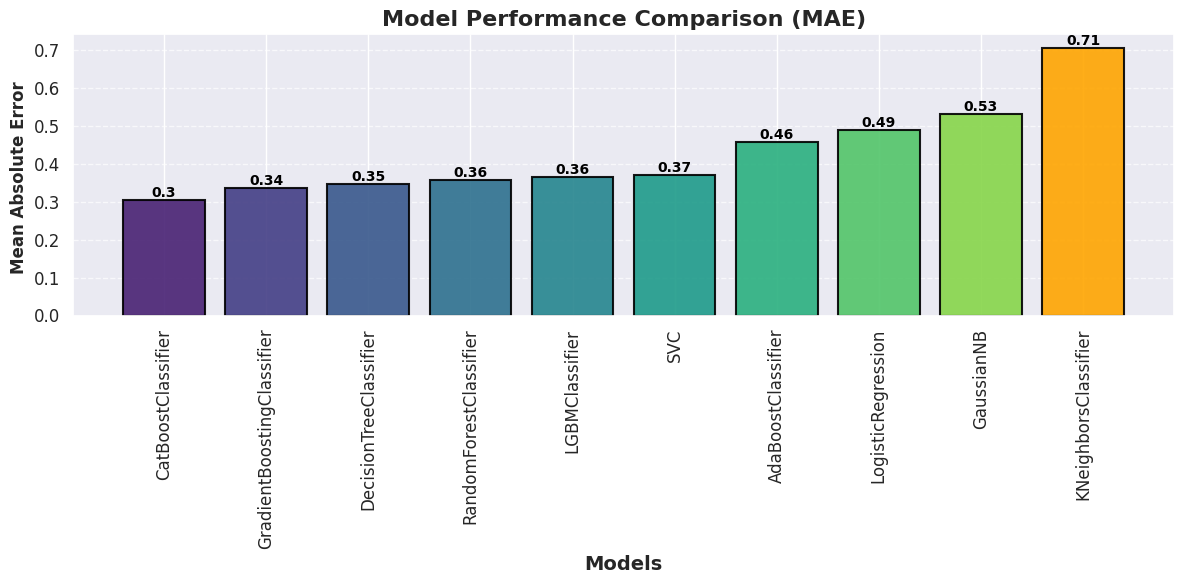

In [ ]:
# Sort the results DataFrame by MSE in ascending order
sorted_results_df = results_df.sort_values(by='MAE')

# Set the aesthetics of the plot
sns.set(style="darkgrid", palette="pastel")

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_results_df['Model'], sorted_results_df['MAE'], color=sns.color_palette("viridis", len(sorted_results_df)))

# Highlight the best model
best_model_index = sorted_results_df['MAE'].idxmin()
bars[best_model_index].set_color('orange')

# Adding labels and title with enhanced font styling
plt.xlabel('Models', fontsize=14, fontweight='bold')
plt.ylabel('Mean Absolute Error ', fontsize=12, fontweight='bold')
plt.title('Model Performance Comparison ', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=12, fontweight='medium')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a shadow effect to the bars
for bar in bars:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)
    bar.set_alpha(0.9)  # Slight transparency for better visibility

# Add data labels on top of the bars with more styling
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

## ***So the best model is `LGBM Classifier`, having Mean Absolute Error (MAE) `0.30`***

## ***If you like `upvote` it and `share`.***